<center><h1 style="color:#173F8A;"> Metodos para Ecuaciones Diferenciales, IMT3410, 2022-2 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Instituto de Ingenieria Matematica y Computacional<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> </h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

<h2 style="color:#03122E;text-align:center;"> Capitulo 2. Metodos para Ecuaciones Diferenciales Parciales Elipticas<br> </h2>
<h3 style="color:#03122E;text-align:center;">             Metodo de Galerkin <br> </h3>
<hr style="border:3px solid #E3AE00 "> </hr>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.sparse.linalg import spsolve
from scipy.integrate import quadrature
from numpy import sin, cos, pi

Resolvemos el problema de Poisson en una dimension:
\begin{equation}
\begin{array}{rclrl}
-\frac{d}{dx}(c \frac{d}{dx}u) &=& f(x)&\mbox{en} & (a,b) \\
u &=&u_D&\mbox{sobre}& \{a,b\}
\end{array}
\end{equation}
Usando el metodo de Galerkin con subespacio de dimension finita $V_N\subset V$

In [10]:
# One dimensional solution
ufun1D = lambda x: sin(pi*x)
g1D = lambda x: ufun1D(x)
f1D = lambda x: (pi)**2*sin(pi*x)

# Ejemplo 1: 
\begin{equation}
V_N = \text{span}\{x^{i}(1-x): 1\leq i\leq N  \}.
\end{equation}

In [28]:
def Ejemplo1(N):
    A1 = np.zeros((N,N),dtype=np.float64)
    b1 = np.zeros(N,dtype=np.float64)
    for i in range(N):
        for j in range(N):
            A1[i,j] = (i+1)*(j+1)/(i+j+1)+(i+2)*(j+2)/(i+j+3)-( (i+1)*(j+2) +(i+2)*(j+1))/(i+j+2)
        b1[i],_ = quadrature(lambda x: x**(i+1)*(1-x)*f1D(x), 0,1)
    ui = np.linalg.solve(A1,b1)
    return ui, A1, b1

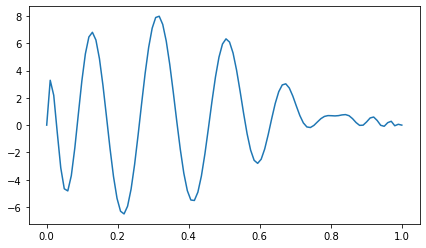

In [57]:
N = 100
ui, A1, b1 = Ejemplo1(N)
ufun = lambda x: sum([ui[i]*x**(i+1)*(1-x) for i in range(N)])
x = np.linspace(0,1,N+2)

fig1, ax1 = plt.subplots(1,1,figsize=(7,4))
ax1.plot(x,ufun(x))
plt.show()

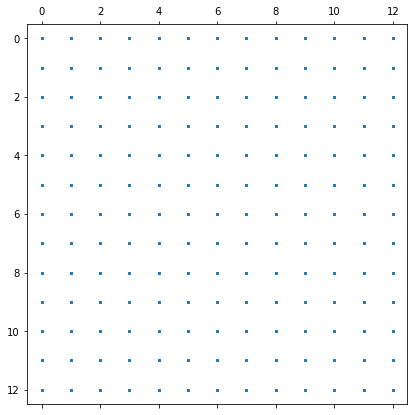

,N,cond(A)
0,3,1.757214e+02
1,4,3.389383e+03
2,5,7.291699e+04
3,6,1.687336e+06
4,7,4.115105e+07
5,8,1.044280e+09
6,9,2.733862e+10
7,10,7.336996e+11
8,11,2.015913e+13
9,12,7.617225e+14


In [52]:
NN = [3,4,5,6,7,8,9,10,11,12,13]
K2 = []
for N in NN:
    ui, A, b =  Ejemplo1(N)
    K2.append(np.linalg.cond(A))
ej1df = pd.DataFrame({'N':NN, 'cond(A)':K2})
fig2, ax2 = plt.subplots(1,1,figsize=(7,7))
ax2.spy(A, markersize=2)
plt.show()
ej1df

# Ejemplo 2:
\begin{equation}
V_N = \text{span}\{\sin(i \pi x): 1\leq i \leq N \}
\end{equation}

# Ejemplo 3:
\begin{equation}
V_N = \text{span}\{v\in V: v|_{K}\in \mathcal P^{1}(K), K = [x_i, x_{i+1}], \text{for } 1\leq i\leq N \} 
\end{equation}

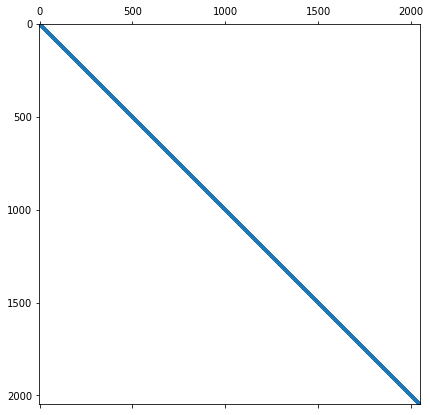

,N,cond(A)
0,2,3.000000e+00
1,4,9.472136e+00
2,8,3.216344e+01
3,16,1.164612e+02
4,32,4.406886e+02
5,64,1.711661e+03
6,128,6.743677e+03
7,256,2.676798e+04
8,512,1.066577e+05
9,1024,4.258016e+05


In [53]:
def Ejemplo3(N):
    h = 1/(N+1)
    A3 = (1.0/h)*(2.0*np.diag(np.ones(N)) - np.diag(np.ones(N-1),-1) -  np.diag(np.ones(N-1),1)) 
    return A3
A3 = Ejemplo3(N=10)
NN = [2**i for i in range(1, 12)]
K2 = []
for N in NN:
    A=  Ejemplo3(N)
    K2.append(np.linalg.cond(A))
ej3df = pd.DataFrame({'N':NN, 'cond(A)':K2})

fig3, ax3 = plt.subplots(1,1,figsize=(7,7))
ax3.spy(A, markersize=2)
plt.show()
ej3df